# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [10]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [11]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | The flight wasn’t that bad, alt..."
1,✅ Trip Verified | I decided to treat myself a...
2,Not Verified | I was very impressed with thei...
3,Not Verified | The flight scheduled at 1840 l...
4,✅ Trip Verified | I have been flying BA for ...


In [12]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Data Cleaning


In [15]:
# Membersihkan teks yang tidak perlu dari kolom reviews
df["cleaned_reviews"] = df["reviews"].apply(lambda x: re.sub(r"(✅ Trip Verified | Not Verified \|)", "", x))

# Menghapus spasi tambahan di awal atau akhir teks
df["cleaned_reviews"] = df["cleaned_reviews"].str.strip()

# Mengubah teks menjadi lowercase (opsional)
df["cleaned_reviews"] = df["cleaned_reviews"].str.lower()

# Menampilkan hasil pembersihan
df[["reviews", "cleaned_reviews"]].head()


,reviews,cleaned_reviews
0,"The flight wasn’t that bad, although the Infl...","the flight wasn’t that bad, although the infli..."
1,I decided to treat myself and my teenage dau...,i decided to treat myself and my teenage daugh...
2,I was very impressed with their efficient bo...,i was very impressed with their efficient boar...
3,The flight scheduled at 1840 left 2hours 40 ...,the flight scheduled at 1840 left 2hours 40 mi...
4,I have been flying BA for over 15 years. I ...,i have been flying ba for over 15 years. i was...


In [16]:
# Menyimpan DataFrame ke file CSV
df.to_csv("data/BA_reviews_cleaned.csv", index=False)


In [ ]:
# Daftar kata positif dan negatif
positive_words = ['good', 'great', 'excellent', 'amazing', 'love', 'fantastic', 'wonderful', 'satisfied', 'happy']
negative_words = ['bad', 'terrible', 'horrible', 'worst', 'disappointing', 'sad', 'angry', 'hate', 'poor']

# Fungsi untuk menentukan sentimen
def classify_sentiment(review):
    review_lower = review.lower()
    positive_count = sum(word in review_lower for word in positive_words)
    negative_count = sum(word in review_lower for word in negative_words)
    
    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'

# Menambahkan kolom 'sentiment' ke DataFrame
df['sentiment'] = df['cleaned_reviews'].apply(classify_sentiment)

# Menghitung jumlah setiap kategori sentimen
sentiment_counts = df['sentiment'].value_counts()

# Menampilkan hasil
print(f"Total Reviews: {sentiment_counts.sum()}")
print(f"Positive Reviews: {sentiment_counts.get('Positive', 0)}")
print(f"Negative Reviews: {sentiment_counts.get('Negative', 0)}")
print(f"Neutral Reviews: {sentiment_counts.get('Neutral', 0)}")

Total Reviews: 1000
Positive Reviews: 300
Negative Reviews: 267
Neutral Reviews: 433


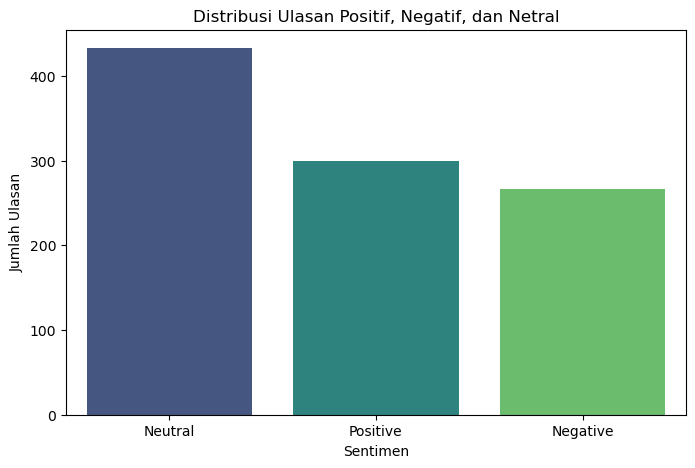

In [ ]:
# Menghitung jumlah setiap kategori sentimen
sentiment_counts = df['sentiment'].value_counts()

# Mengatur plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)

# Menampilkan plot
plt.show()

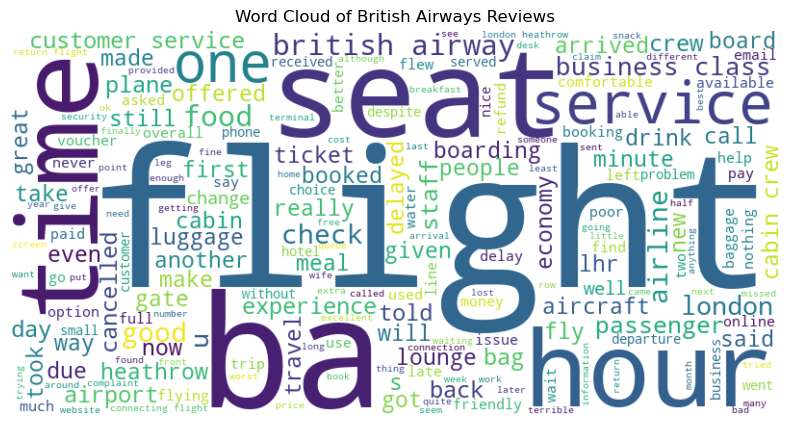

In [32]:
# Menggabungkan semua ulasan menjadi satu string
all_reviews = " ".join(df["cleaned_reviews"])

# Membuat dan menampilkan word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of British Airways Reviews')
plt.show()


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


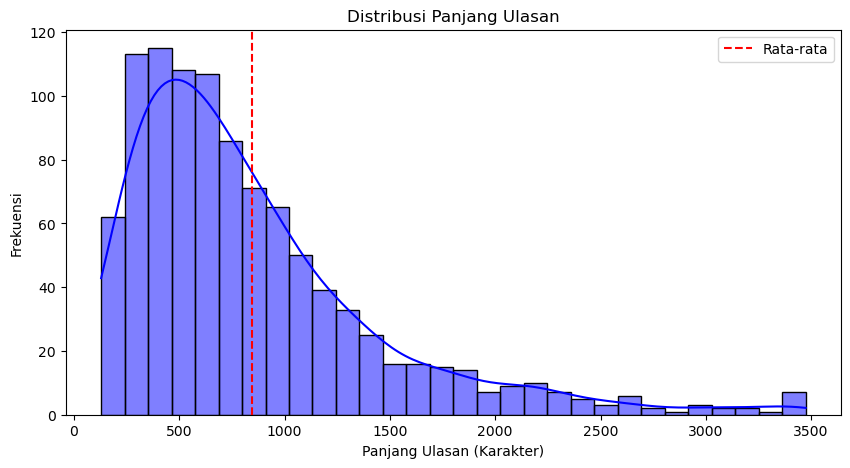

In [27]:
# Menghitung panjang setiap ulasan
df['review_length'] = df['cleaned_reviews'].str.len()

# Membuat histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=30, kde=True, color='blue')

# Menambahkan judul dan label
plt.title('Distribusi Panjang Ulasan')
plt.xlabel('Panjang Ulasan (Karakter)')
plt.ylabel('Frekuensi')
plt.axvline(df['review_length'].mean(), color='red', linestyle='--', label='Rata-rata')
plt.legend()

# Menampilkan plot
plt.show()


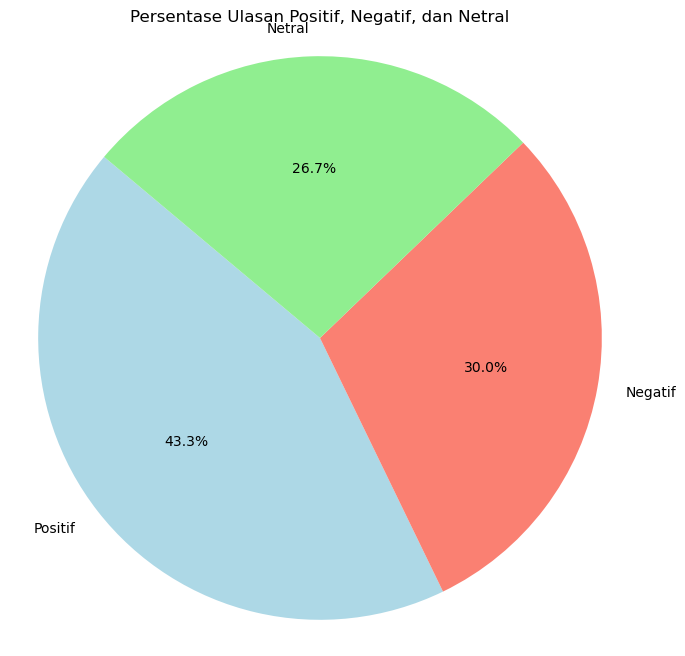

In [35]:
# Menghitung jumlah setiap kategori sentimen
sentiment_counts = df['sentiment'].value_counts()
labels = ['Positif', 'Negatif', 'Netral']  # Pastikan nama kategori sesuai dengan yang ada di DataFrame

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon', 'lightgreen'])
plt.title('Persentase Ulasan Positif, Negatif, dan Netral')
plt.axis('equal')  # Menjaga proporsi lingkaran

# Menampilkan plot
plt.show()



In [29]:
# Daftar kata positif dan negatif
positive_words = ['good', 'great', 'excellent', 'amazing', 'love', 'fantastic', 'wonderful', 'satisfied', 'happy']
negative_words = ['bad', 'terrible', 'horrible', 'worst', 'disappointing', 'sad', 'angry', 'hate', 'poor']

# Fungsi untuk menentukan sentimen
def classify_sentiment(review):
    # Konversi teks menjadi huruf kecil untuk pencocokan yang lebih baik
    review_lower = review.lower()
    positive_count = sum(word in review_lower for word in positive_words)
    negative_count = sum(word in review_lower for word in negative_words)
    
    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'

# Menambahkan kolom 'sentiment' ke DataFrame
df['sentiment'] = df['cleaned_reviews'].apply(classify_sentiment)

# Melihat beberapa contoh hasil
print(df[['cleaned_reviews', 'sentiment']].head())


                                     cleaned_reviews sentiment
0  the flight wasn’t that bad, although the infli...  Positive
1  i decided to treat myself and my teenage daugh...  Negative
2  i was very impressed with their efficient boar...   Neutral
3  the flight scheduled at 1840 left 2hours 40 mi...  Negative
4  i have been flying ba for over 15 years. i was...  Negative
